# Introducción

Los árboles de decisión nos permiten también hacer clasificaciones. En este ejercicio, trataremos de predecir las especies de los peces y graficaremos nuestro árbol de decisión.

Empezamos como siempre cargando nuestras librerías y data sets.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn import tree

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("Fish.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


# Análisis de Datos

En este análisis, queremos entender la distribución de nuestros peces. Podemos empezar aplicando un gŕafico de barras para este propósito.

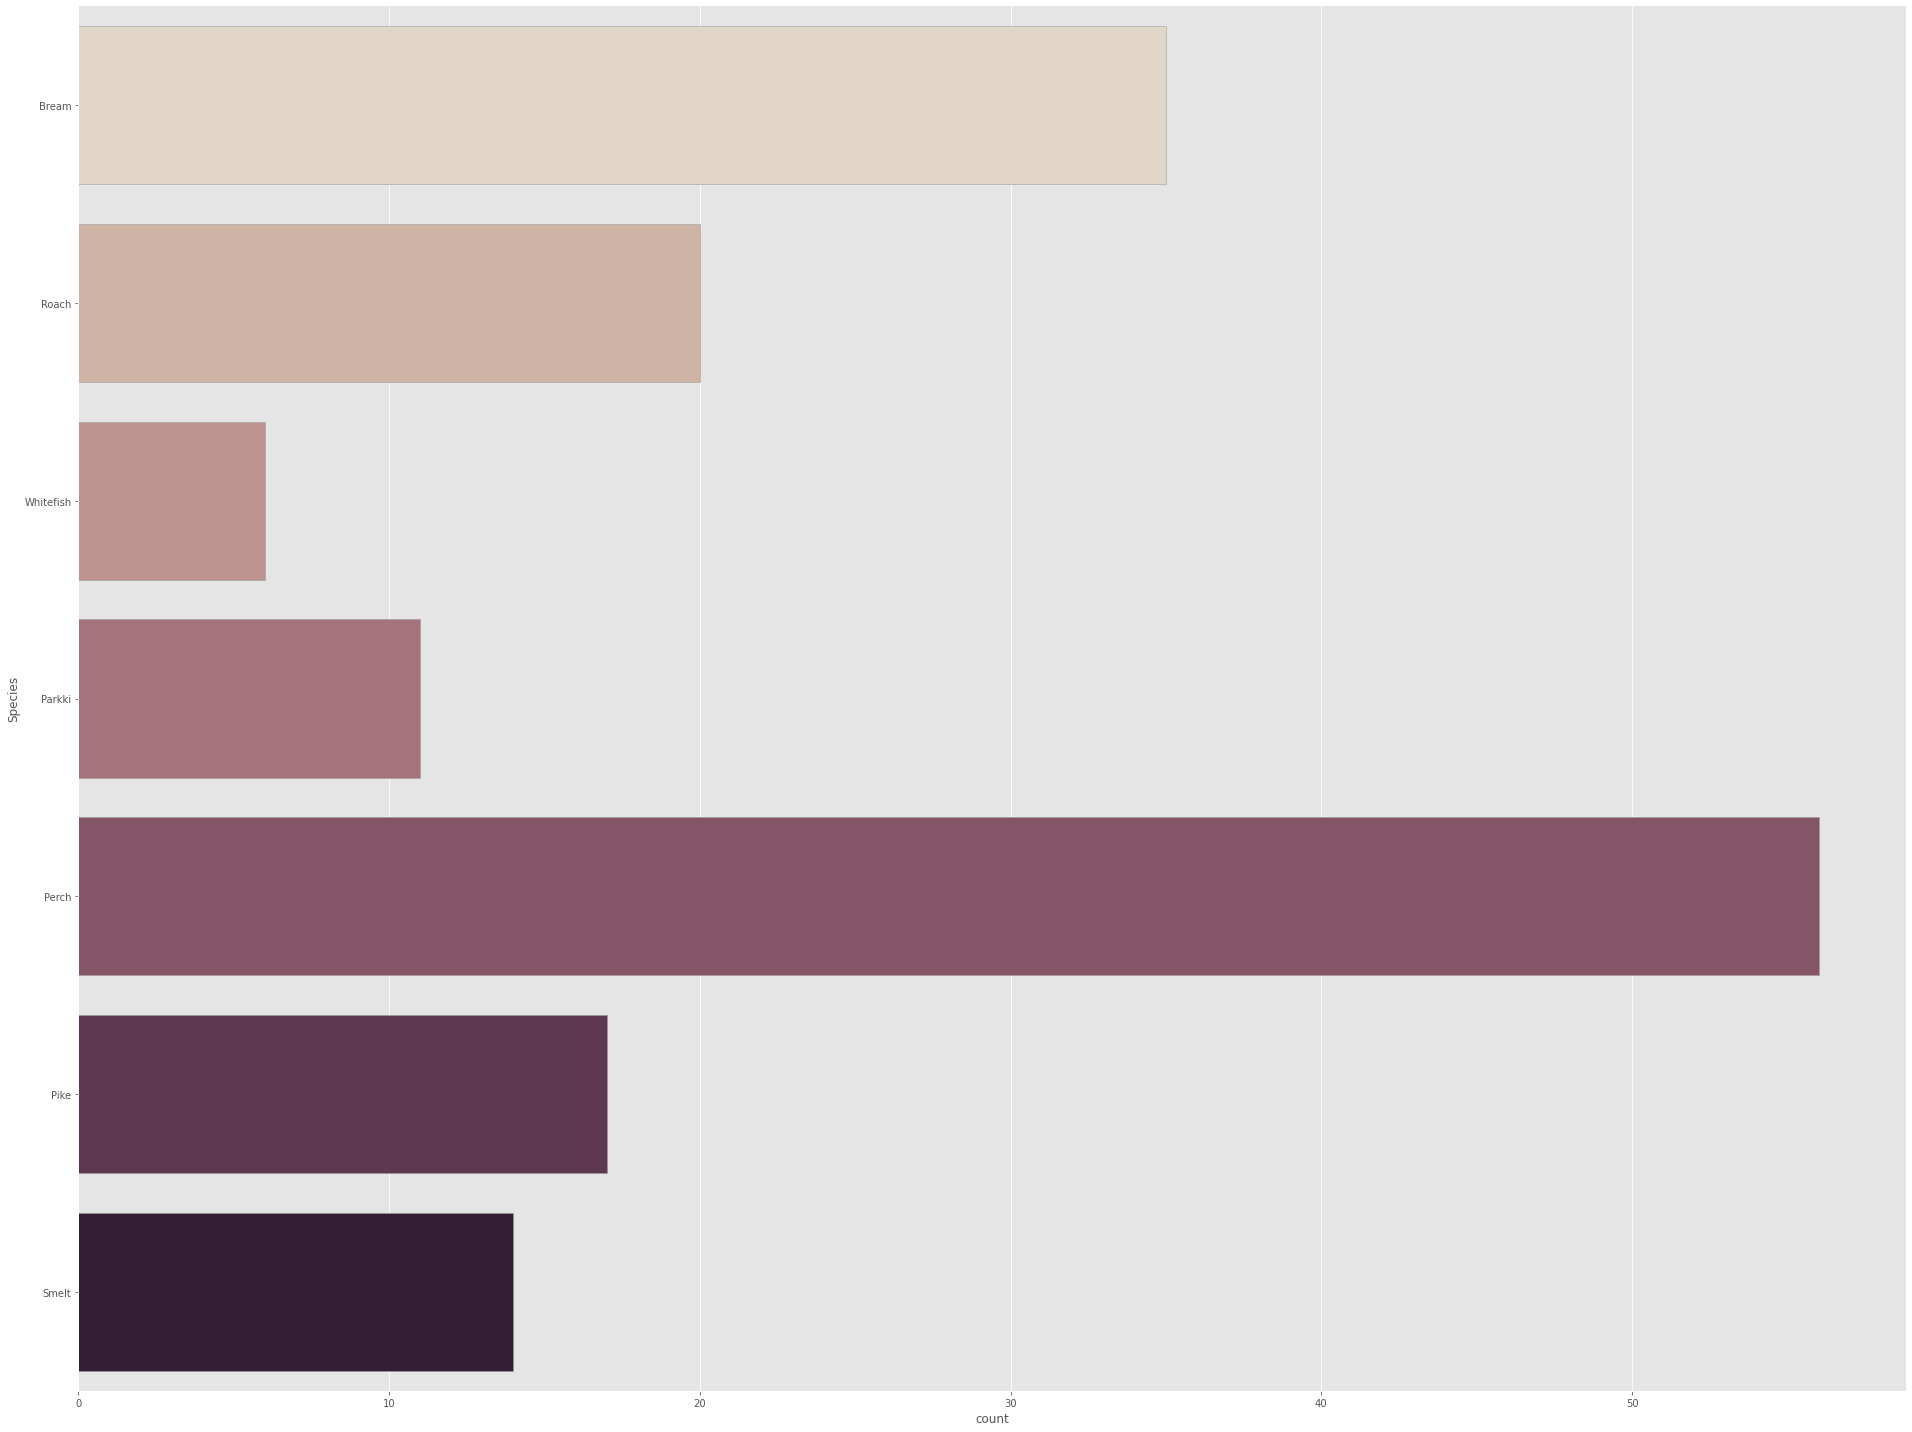

In [ ]:
sns.catplot(y="Species", kind="count", height=20, aspect=20/15,
            palette="ch:.25", edgecolor=".6",
            data=df)

Algo que podemos ver es que la especie Perch (perca en español) esta sobre representada en nuestro data set. Esto puede afectar nuestro modelo a la hora de entrenar, ya que no tenemos un data set balanceado. Lo anterior quiere decir que existen muchos datos para describir una clase, pero no tantos para describir otros. 

# Entrenamiento de Modelo

Para este caso en especial, usaremos todas las variables para entrenar nuestra variable. Por ende, la variable y a predecir es Species.

Procedemos como de costumbre dividiendo datos de entrenamiento y prueba.

In [ ]:
X = df.drop(["Species"], axis=1)
y = df["Species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8125

El resultado de este ejercicio es del 81% de precisión a la hora de hacer predicciones. Hay que notar que al reproducir este ejercicio, el resultado puede variar porque estamos utilizando un parámatros *random_state* que nos permite elegir aleatoriamente nuestros datos de entrenamiento y prueba.

Otra forma de entender mejor el problema es con una [matriz de confusión](https://es.wikipedia.org/wiki/Matriz_de_confusi%C3%B3n#:~:text=En%20el%20campo%20de%20la,se%20emplea%20en%20aprendizaje%20supervisado.). 

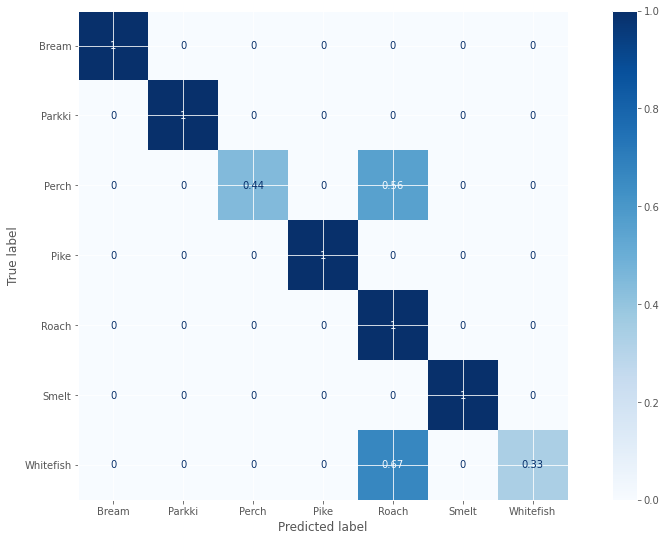

In [ ]:
matriz = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
plt.show(matriz)
plt.show()

Con la matriz de confusión podemos ver que el modelo tuvo problemas para predecir a la especia perca, falló con la especie pescado blanco y atinó todas las demás especies.

Sin embargo, hay que tener cuidado. Como se mencionó antes, nuestro dataset esta desbalanceado. Parece tener problemas para distinguir la especie prominente (un posible sub-ajuste). Al mismo tiempo, lo que parecen ser buenas predicciones puede ser una señala de sobre-ajuste. Por esto, veremos en futuros notebooks como atender esta situación.

# Visualización del Árbol

Dentro de la librería *Scikit Learn* podemos encontrar la función *plot_tree*, la cual nos permite visualizar como se tomaron las decisiones para clasificar dentro del árbol.

[Text(532.2461538461538, 471.76714285714286, 'X[4] <= 12.438\ngini = 0.778\nsamples = 127\nvalue = [25, 10, 47, 14, 19, 9, 3]'),
 Text(463.5692307692307, 436.82142857142856, 'X[1] <= 39.9\ngini = 0.733\nsamples = 102\nvalue = [2, 10, 45, 14, 19, 9, 3]'),
 Text(429.2307692307692, 401.87571428571425, 'X[4] <= 3.23\ngini = 0.699\nsamples = 93\nvalue = [2, 10, 45, 5, 19, 9, 3]'),
 Text(274.7076923076923, 366.93, 'X[2] <= 9.45\ngini = 0.18\nsamples = 10\nvalue = [0, 0, 1, 0, 0, 9, 0]'),
 Text(240.36923076923077, 331.9842857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0]'),
 Text(309.04615384615386, 331.9842857142857, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 0, 0, 0, 9, 0]'),
 Text(583.7538461538461, 366.93, 'X[2] <= 27.15\ngini = 0.647\nsamples = 83\nvalue = [2, 10, 44, 5, 19, 0, 3]'),
 Text(377.7230769230769, 331.9842857142857, 'X[4] <= 6.569\ngini = 0.663\nsamples = 52\nvalue = [2, 10, 22, 0, 18, 0, 0]'),
 Text(274.7076923076923, 297.03857142857146, 'X[4] <= 6.112\ngini = 

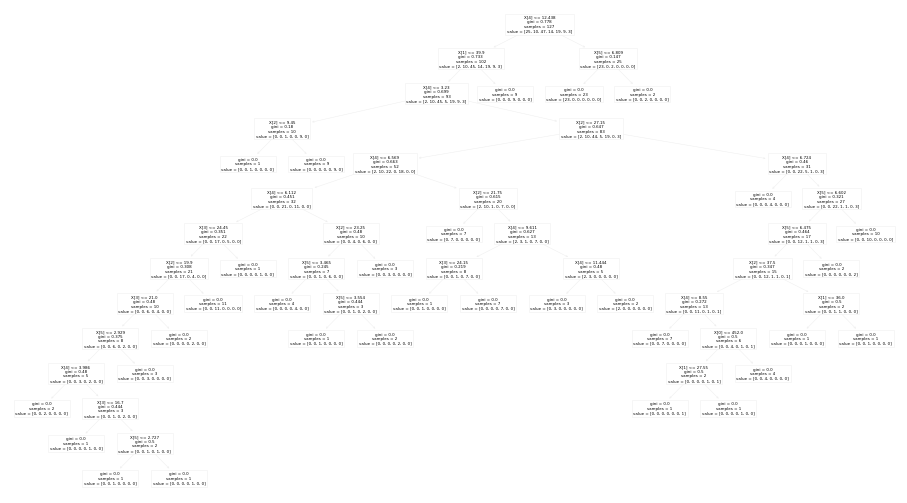

In [ ]:
tree.plot_tree(clf) 

<a href="https://colab.research.google.com/github/XavierCarrera/Tutorial-Machine-Learning-Arboles/blob/main/4_Bagging_vs_Boosting_vs_RandomForest_Clasificaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

Finalmente, retomaremos el problema del segundo notebook para poder hacer una clasificación usando nuestros métodos de ensamble.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("Fish.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


# Entrenamiento de Modelos

Antes de entrenar nuestro modelo, vamos a recordar el problema de nuestro primer árbol de decisión:

Un primer problema es que tenemos un data set desbalanceado en donde una clase está más representada que otras. Como resultado, podríamos tener un sobreajuste para las clases más representadas y subajuste para la clase principal (percha).

En este caso, usaremos nuestros métodos de ensamble para categorizar cada una de estas clases. 

Recordemos que la precisión con el primer árbol fue de 0,78.

In [ ]:
X = df.drop(["Species"], axis=1)
y = df["Species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
bagging = BaggingClassifier().fit(X_train, y_train)
y_pred = bagging.predict(X_test)
accuracy_score(y_test, y_pred)

0.8125

In [ ]:
boosting = AdaBoostClassifier().fit(X_train, y_train)
y_pred = boosting.predict(X_test)
accuracy_score(y_test, y_pred)

0.28125

In [ ]:
random = RandomForestClassifier().fit(X_train, y_train)
y_pred = random.predict(X_test)
accuracy_score(y_test, y_pred)

0.8125

En este caso, hemos visto que Bagging y Random Forest tuvieron resultados solo un poco mejores a un árbol de clasificación. Lo más llamativo es como AdaBoost se desempeñó bastante peor. La razón puede ser dada porque el problema no le permite generar los suficientes árboles para generar una mejor predicción. Si pudieramos incluir más entradas y/o features, nuestro modelo podría funcionar mejor.

Finalmente, podemos generar dos matrices de confusión para ver el desempeño de nuestros clasificadores Bagging y Random Forest.

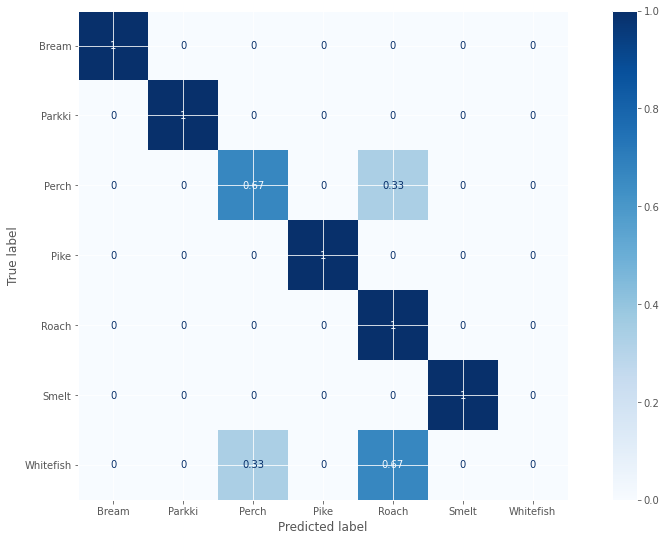

In [ ]:
matriz = plot_confusion_matrix(bagging, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
plt.show(matriz)
plt.show()

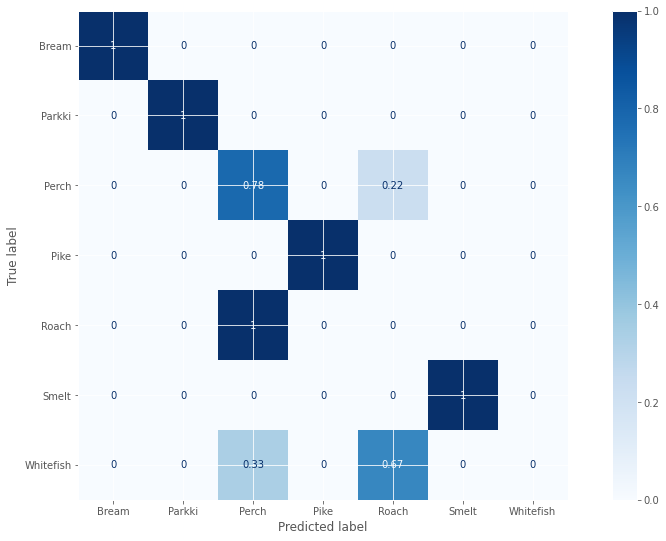

In [ ]:
matriz = plot_confusion_matrix(random, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
plt.show(matriz)
plt.show()

En ambos casos, tuvieron aciertos similares al árbol de clasificación. En un caso real, posiblemente nos iríamos por Random Forest dado que mejoró mucho las predicciones de la clase principal. Presumiblemente (y suponiendo que el data set es representativo de una población total), podría resolver exitosamente la mayoría de casos.

Sin embargo, tenemos que seguir sospechando de las predicciones perfectas del resto de las clases. Podríamos tener o no un sobreajuste en este sentido.